# Tangente

Tangente vient du latin tangere, toucher : en géométrie, la tangente à une courbe en un de ses points est une droite qui « touche » la courbe au plus près au voisinage de ce point. La courbe et sa tangente forment alors un angle nul en ce point.

La notion de tangente permet d'effectuer des approximations : pour la résolution de certains problèmes qui demandent de connaître le comportement de la courbe au voisinage d'un point, on peut assimiler celle-ci à sa tangente. Ceci explique la parenté entre la notion de tangente et le calcul différentiel.

En d'autres termes, la tengente peut être utilisée pour estimer la valeur de la dérivée en un point donné de manière approximative lorsque la formule exacte de la dérivée n'est pas connue ou n'est pas facilement calculable.

(Pour un point X sur une fonction, par laquelle passe une tangente ; se trouve le point Y (soit le résultat de la dérivation de la fonction) ; représenté par la pente de la tangente (voir le graph tout en bas) pouvant être calculé à partir de $f(x)$).

### Calculs de tangente 

#### Tangente à un graphe de fonction numérique

Ici f est une fonction définie sur un intervalle de la forme $] a − α , a + α [ , α > 0 $, à valeurs réelles. On se préoccupe de savoir si le graphe, d'équation $y = f(x)$, admet une tangente au point _A_ de coordonnées $(a,f(a))$.

La sécante entre les points d'abscisse $a$ et $a+h$ est la droite passant par _A_ et de pente $p(h)={\frac {f(a+h)-f(a)}{h}}$, qui est un taux de variation de $f$. Il y a trois possibilités :

- si $p(h)$ admet une limite finie $p$ lorsque $h$ tend vers 0, il y a une tangente : la droite passant par _A_ et de pente _p_. La fonction est alors dérivable et la pente de la tangente est la valeur de la dérivée. L'équation de cette tangente est alors :

${\displaystyle y=f'(a)(x-a)+f(a)}$ ;

- si $p(h)$ admet une limite infinie, il y a une tangente : la droite d'équation $x = a$. Cela se produit par exemple pour la fonction $f(x)={\sqrt {|x|}}$ en $a = 0$ ;
- sinon (s'il n'y a pas de limite), il n'y a pas de tangente.

## Exemple

Prenons l'exemple de la fonction $f(x) = x^2$. Pour calculer la tangente à la courbe de cette fonction en un point donné $x_0$ :

1. Il faut trouver les coordonnées du point $x_0$ sur la courbe de la fonction : $(x_0, f(x_0)) = (x_0, {x_0}^{2})$.

Par exemple, si on prend $4$ pour $x_0$ on peut calculer :

$(x_0, f(x_0)) = (4, f(4)) = (4, 4^2) = (4, 16)$

2. Il faut trouver un deuxième point voisin du point $x_0$ sur la courbe de la fonction. Par exemple, on peut choisir un point à une petite distance $h$ de $x_0$, où $h$ est un nombre très petit (par exemple, h = 0,001). De sorte que : $x_1 = x_0 + h$.

Par exemple, si on prend $h = 0.01$ :

$x_1 = x_0 + h = 4 + 0.01 = 4.01$

$f(x_1) = f(x_0 + h) = f(4.01) = 16.0801$

3. Trouver la pente de la droite qui passe par les deux points. La pente de la droite est donnée par la formule suivante :

$pente = \frac{(f(x0+h) - f(x0))}{h}$

Si on l'applique à notre exemple, ça nous donne :

$pente = \frac{(f(x0+h) - f(x0))}{h} = \frac{16.0801 - 16}{0.01} = \frac{0.0801}{0.01} = 8,01$

On a ici obtenu a la fois la pente de la tengente, et le résultat de F'(x), soit la position Y de la dérivée de la fonction ; comme on peut le constater sur le graph ci-dessous.

4. Utiliser la formule de la tangente pour écrire l'équation de la tangente :

$tangente = pente * (x - x0) + f(x0)$

Si on l'applique à notre exemple, ça nous donne :

$tangente = pente * (x - x0) + f(x0) = 8,01 * (x - 4) + 16$

On peut faire un test, par exemple avec $x=4$ :

$tangente = 8,01 * (x - 4) + 16 = 8,01 * (4 - 4) + 16 = 16$

Ici on a bien le résultat de $F(x) = 4^2 = 16$. Cette approche est utile dans le cas ou nous ne connaissons pas exactement la formule de $f$ ; mais uniquement un ensemble de points de la fonction.

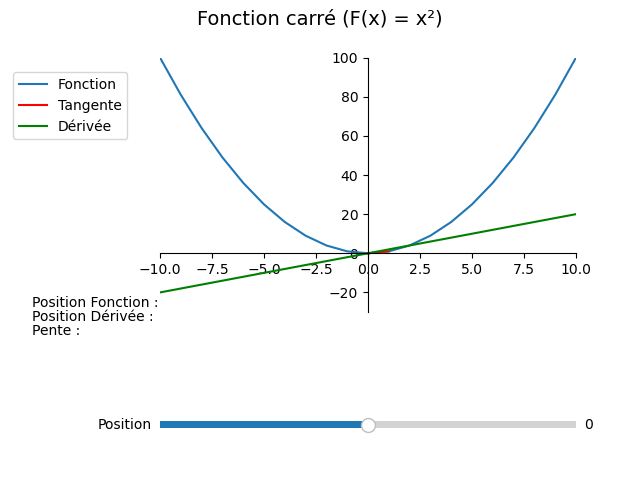

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Créer la figure et les axes
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.35)
ax.set_xlim(-10, 10)
ax.set_ylim(-30, 100)

# Coefficient initial pour a
a_init = 1

# Créer la fonction carré et le tracé initial
x = range(-10, 11)
y = [xi**2 for xi in x]
line, = ax.plot(x, y, label='Fonction')

# Calculer la dérivée de la fonction carré
dydx = [2*xi for xi in x]

# Créer la ligne pour la tangente
line_tangent, = ax.plot([0, 1], [0, 1], label='Tangente', color='red')

# Créer le tracé de la dérivée de la fonction carré
line_deriv, = ax.plot(x, dydx, label='Dérivée', color='green')

# Créer le curseur pour la position sur la courbe
ax_pos = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor='lightgoldenrodyellow')
slider_pos = Slider(ax_pos, 'Position', -10, 10, valinit=0)

# Créer des zones de texte pour afficher les coordonnées et la pente
ax_legend = fig.add_axes([0.05, 0.2, 0.2, 0.1])
ax_legend.axis('off')
text_pos_func = ax_legend.text(0, 0.6, 'Position Fonction :\n\n\n')
text_pos_deriv = ax_legend.text(0, 0.3, 'Position Dérivée :\n\n\n')

text_slope = ax_legend.text(0, 0.0, 'Pente :\n\n\n')

# Fonction pour mettre à jour la tangente et les informations affichées
def update(val):
    pos = slider_pos.val
    x_pos = pos
    y_pos = x_pos**2
    slope = 2*x_pos
    x_tangent = [x_pos-5, x_pos+5]
    y_tangent = [slope*(x-x_pos) + y_pos for x in x_tangent]
    line_tangent.set_xdata(x_tangent)
    line_tangent.set_ydata(y_tangent)
    text_pos_func.set_text(f'Position Fonction : ({x_pos:.2f}, {y_pos:.2f})')
    text_pos_deriv.set_text(f'Position Dérivée : ({x_pos:.2f}, {slope:.2f})')
    text_slope.set_text(f'Pente : {slope:.2f}')
    
    # Mettre à jour le titre et la légende
    fig.suptitle(f'Fonction carré (F(x) = x²)', fontsize=14)
    fig.canvas.draw_idle()

# Régler les bords des axes pour se croiser en zéro
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')


# Créer un nouvel axe à gauche du graphique pour la légende
ax_legend = fig.add_axes([0.05, 0.68, 0.12, 0.2])
ax_legend.axis('off')
ax_legend.legend(*ax.get_legend_handles_labels(), loc='center', fontsize=10)


# Lier le curseur à la fonction de mise à jour
slider_pos.on_changed(update)

# Mettre un titre à la figure
fig.suptitle(f'Fonction carré (F(x) = x²)', fontsize=14)

# Afficher la figure
plt.show()

Pour plus d'informations : https://fr.wikipedia.org/wiki/Tangente_(g%C3%A9om%C3%A9trie)